In [3]:
import os

# Define the data directory
data_dir = "New_Recordings"

# Check if the directory exists
if not os.path.exists(data_dir):
    print(f"Error: Directory '{data_dir}' not found.")
else:
    # List files in the directory
    file_names = os.listdir(data_dir)

# Display the first 50 loaded file names if directory exists
print("Here are the first 20 files")
for file_name in file_names[:20]:
    print(file_name)


Here are the first 20 files
0_STD_001_2.mp3
0_STD_002_2.mp3
0_STD_003_1.mp3
0_STD_004_0.mp3
0_STD_005_0.mp3
0_STD_006_0.mp3
0_STD_007_0.mp3
0_STD_008_2.mp3
0_STD_009_0.mp3
0_STD_011_2.mp3
0_STD_012_1.mp3
0_STD_013_2.mp3
0_STD_014_0.mp3
0_STD_015_0.mp3
0_STD_016_0.mp3
0_STD_017_0.mp3
0_STD_018_2.mp3
0_STD_019_0.mp3
0_STD_020_0.mp3
0_STD_021_2.mp3


In [4]:
import librosa
import numpy as np

# Function to extract MFCC features from audio files
def extract_features(file_path, size=500):
    audio, _ = librosa.load(file_path, sr=22050)  # Adjust sample rate as needed
    mfccs = librosa.feature.mfcc(y=audio, sr=22050, n_mfcc=13)
    mfccs_padded = librosa.util.fix_length(mfccs, size=size, axis=1)  # Pad the MFCC sequence to a fixed length
    return mfccs_padded

# Initialize lists to store features and labels
features = []
labels = []

# Iterate over each audio file
for file_name in file_names:
    if file_name.endswith('.mp3'):  # Process only .mp3 files
        # Extract features
        file_path = os.path.join(data_dir, file_name)
        file_features = extract_features(file_path)
        features.append(file_features)

        # Extract label from file name
        # Extract the first character of the file name as the label (assuming consistent naming)
        label = int(file_name[0][0])
        labels.append(label)

# Convert lists to numpy arrays
features = np.array(features)
labels = np.array(labels)

# Print shapes to verify
print("Features shape:", features.shape)
print("Labels shape:", labels.shape)


Features shape: (300, 13, 500)
Labels shape: (300,)


In [5]:
from sklearn.model_selection import train_test_split
from tensorflow.keras import layers, models

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.2, random_state=42)

# Define RNN model
model = models.Sequential([
    layers.LSTM(128, input_shape=(X_train.shape[1], X_train.shape[2])),
    layers.Dense(64, activation='relu'),
    layers.Dense(51, activation='softmax')  # Assuming there are 51 possible labels (0 to 50)
])

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/10
8/8 [==============================] - 6s 211ms/step - loss: 2.7883 - accuracy: 0.6042 - val_loss: 1.6939 - val_accuracy: 0.8167
Epoch 2/10
8/8 [==============================] - 1s 67ms/step - loss: 1.1011 - accuracy: 0.8708 - val_loss: 0.7078 - val_accuracy: 0.8833
Epoch 3/10
8/8 [==============================] - 1s 69ms/step - loss: 0.4749 - accuracy: 0.8750 - val_loss: 0.4454 - val_accuracy: 0.8833
Epoch 4/10
8/8 [==============================] - 1s 69ms/step - loss: 0.2568 - accuracy: 0.8958 - val_loss: 0.3389 - val_accuracy: 0.8500
Epoch 5/10
8/8 [==============================] - 1s 64ms/step - loss: 0.1333 - accuracy: 0.9750 - val_loss: 0.2894 - val_accuracy: 0.9000
Epoch 6/10
8/8 [==============================] - 1s 70ms/step - loss: 0.0754 - accuracy: 0.9917 - val_loss: 0.2664 - val_accuracy: 0.9167
Epoch 7/10
8/8 [==============================] - 1s 67ms/step - loss: 0.0492 - accuracy: 0.9958 - val_loss: 0.2596 - val_accuracy: 0.9000
Epoch 8/10
8/8 [==========

In [6]:
# Evaluate model performance on test data
loss, accuracy = model.evaluate(X_test, y_test)
print("Test Loss:", loss)
print("Test Accuracy:", accuracy)

# Make predictions on test data
predictions = model.predict(X_test)

# Convert softmax probabilities to predicted labels
predicted_labels = np.argmax(predictions, axis=1)

# Compare predicted labels with true labels
correct_predictions = np.sum(predicted_labels == y_test)
total_samples = len(y_test)
print("Number of correct predictions:", correct_predictions)
print("Total samples in test set:", total_samples)
print("Accuracy on test set:", correct_predictions / total_samples)

2/2 [==============================] - 0s 44ms/step - loss: 0.2667 - accuracy: 0.8833
Test Loss: 0.2666957974433899
Test Accuracy: 0.8833333253860474
2/2 [==============================] - 1s 26ms/step
Number of correct predictions: 53
Total samples in test set: 60
Accuracy on test set: 0.8833333333333333


2/2 [==============================] - 0s 54ms/step


c:\Users\user\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\metrics\_ranking.py:1001: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  UndefinedMetricWarning,
c:\Users\user\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\metrics\_ranking.py:1001: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  UndefinedMetricWarning,
c:\Users\user\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\metrics\_ranking.py:1001: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  UndefinedMetricWarning,
c:\Users\user\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\metrics\_ranking.py:1001: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  UndefinedMetricWarning,
c:\Users\user\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\metrics\_

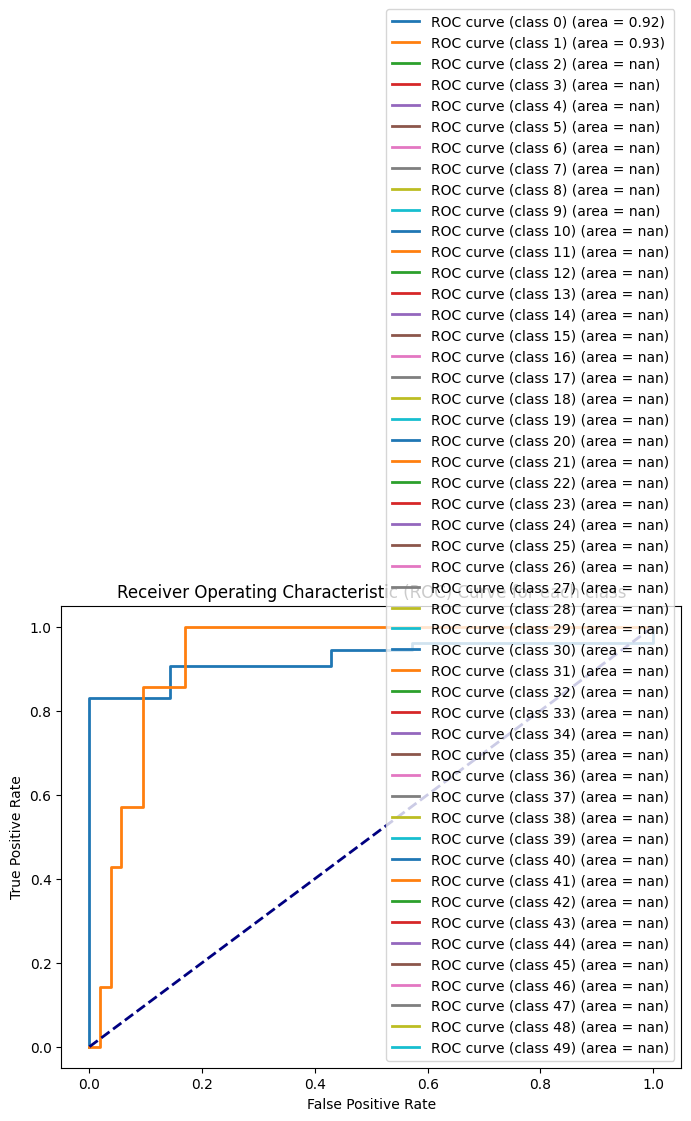

In [7]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize

# Obtain predicted probabilities for each class
predicted_probabilities = model.predict(X_test)

# Convert labels to one-hot encoding
y_test_bin = label_binarize(y_test, classes=np.arange(50))

# Compute ROC curve and AUC for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(50):  # Assuming there are 50 classes
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], predicted_probabilities[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC curve for each class
plt.figure(figsize=(8, 6))
for i in range(50):
    plt.plot(fpr[i], tpr[i], lw=2, label='ROC curve (class {}) (area = {:0.2f})'.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve for each class')
plt.legend(loc="lower right")
plt.show()